#**CHƯƠNG 3. MÔ HÌNH DỰ ĐOÁN DOANH THU**

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
store_data = pd.read_csv('/content/drive/Shareddrives/NHÓM HỌC TẬP /NĂM 3/PHÂN TÍCH DỮ LIỆU VỚI R PYTHON/PROJECT/DATASET/02. Rossmann Store/store.csv', encoding= 'unicode_escape')
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
train_data = pd.read_csv('/content/drive/Shareddrives/NHÓM HỌC TẬP /NĂM 3/PHÂN TÍCH DỮ LIỆU VỚI R PYTHON/PROJECT/DATASET/02. Rossmann Store/train.csv', encoding= 'unicode_escape', low_memory=False)
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
combined_data = pd.merge(store_data,train_data,on='Store')
combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


#3.2 Phân tích và khai thác dữ liệu EDA

##Khám phá dữ liệu

In [ ]:
combined_data.shape

(1017209, 18)

In [ ]:
# Checking for null values
combined_data.isnull().mean()*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
dtype: float64

In [ ]:
# Unique values
columns = list(combined_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print('Unique values in column :',combined_data[i].unique())

Unique values in column : [   1    2    3 ... 1113 1114 1115]
Unique values in column : ['c' 'a' 'd' 'b']
Unique values in column : ['a' 'c' 'b']
Unique values in column : [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in column : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in column : [0 1]
Unique values in column : [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in column : [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in column : [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Unique values in column : [5 4 3 2 1 7 6]
Unique values in column : [ 5263  5020  4782 ... 20362 18841 21237]
Unique values in column : [ 555  546  523 ... 3727 4022 4106]
Unique values in column : [1 0]
Unique values in column : [1 0]
Unique values in column : ['0' 'a' 'b' 'c

## Trực quan hóa dữ liệu

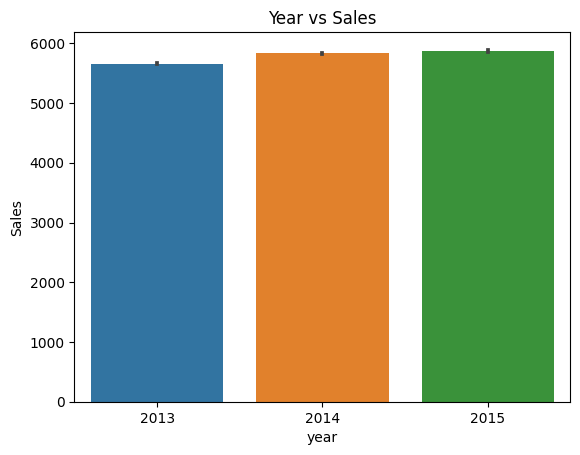

In [ ]:
# extracting year and month from Date 
combined_data['year'] = combined_data['Date'].apply(lambda x : int(str(x)[0:4]))
combined_data['month'] = combined_data['Date'].apply(lambda x : int(str(x)[5:7]))

# Sales with respect to year 
sns.barplot(x='year', y='Sales', data=combined_data).set(title='Year vs Sales')
# sns.barplot(x='month',y='Sales', data=combined_data).set(title='Month vs Sales')

plt.show()

[Text(0.5, 1.0, 'Sales vs Day of Week')]

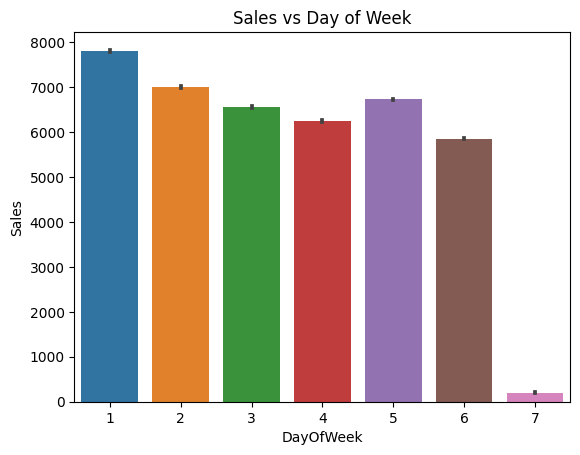

In [ ]:
sns.barplot(x='DayOfWeek',y='Sales',data=combined_data).set(title='Sales vs Day of Week')

[Text(0.5, 1.0, 'Sales on Promo')]

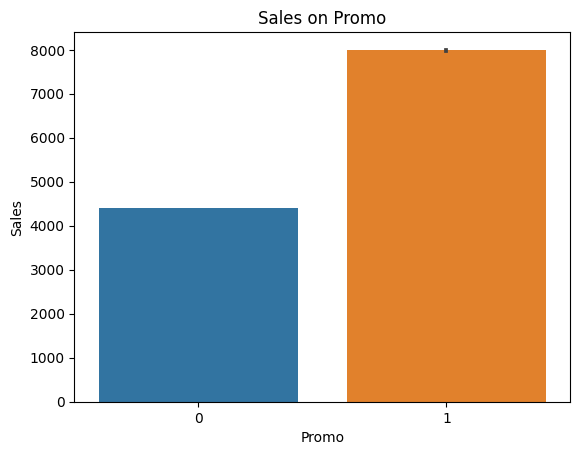

In [ ]:
# Lets see how promo is impacting sales
sns.barplot(x='Promo',y='Sales',data=combined_data).set(title='Sales on Promo')

<ipython-input-15-1cb06c2f38af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'


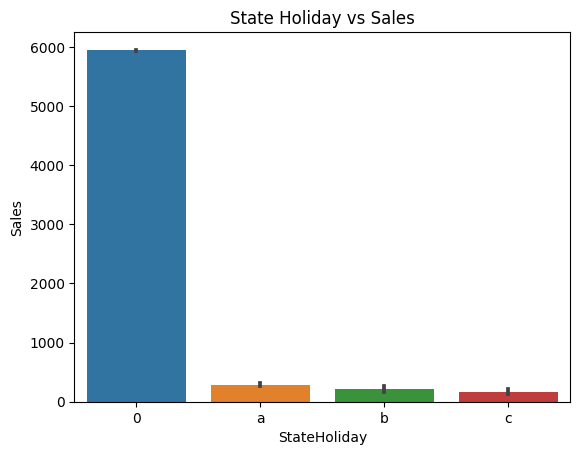

In [ ]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_data).set(title='State Holiday vs Sales')
plt.show()

[Text(0.5, 1.0, 'School Holiday vs Sales')]

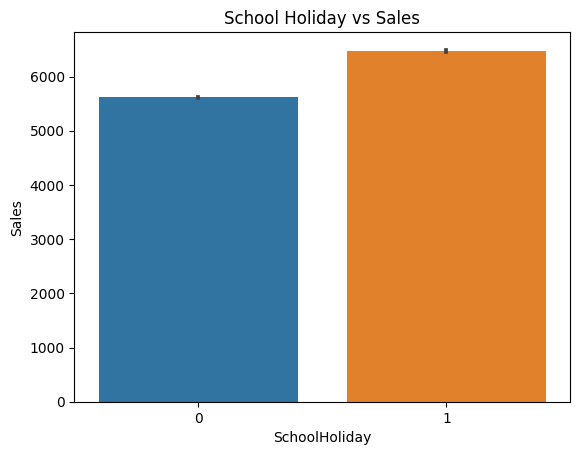

In [ ]:
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')

[Text(0.5, 1.0, 'StoreType vs Sales')]

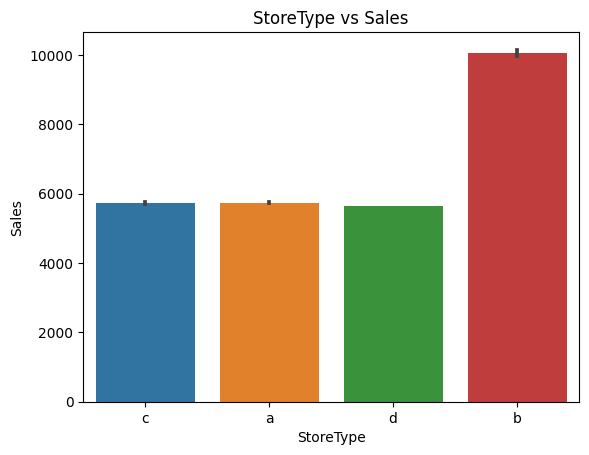

In [ ]:
# Sales with respect to Storetype
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')


[Text(0.5, 1.0, 'Assortment vs Sales')]

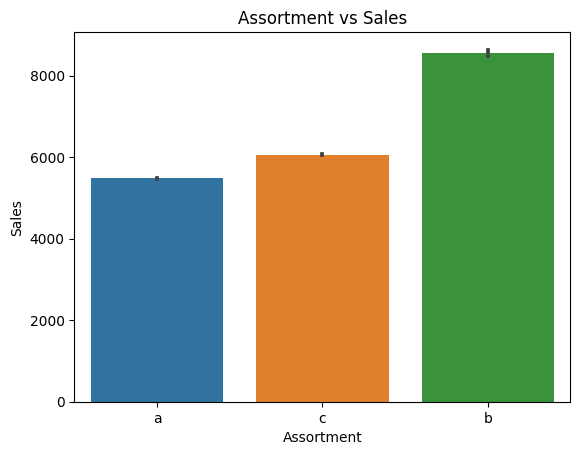

In [ ]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')

#3.3. Tiền xử lý dữ liệu

##Filling Missing Values and Removing Outliers

In [ ]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_data.update(store_data['Promo2SinceWeek'].fillna(value=0,inplace=True))
store_data.update(store_data['Promo2SinceYear'].fillna(value=0,inplace=True))
store_data.update(store_data['PromoInterval'].fillna(value=0,inplace=True))

In [ ]:
# Filling CompetitionDistance with mean distance
mean_CompetitionDistance = store_data['CompetitionDistance'].mean()
store_data.update(store_data['CompetitionDistance'].fillna(value=mean_CompetitionDistance,inplace=True))

In [ ]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_CompetitionOpenSinceMonth = store_data['CompetitionOpenSinceMonth'].mode()[0]
mode_CompetitionOpenSinceYear = store_data['CompetitionOpenSinceYear'].mode()[0]

store_data.update(store_data['CompetitionOpenSinceMonth'].fillna(value=mode_CompetitionOpenSinceMonth,inplace=True))
store_data.update(store_data['CompetitionOpenSinceYear'].fillna(value=mode_CompetitionOpenSinceYear,inplace=True))

store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
combined_data = pd.merge(store_data,train_data,on='Store')
print(combined_data.shape)
combined_data.head(5)

(1017209, 18)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
combined_data.isnull().mean()*100

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
dtype: float64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

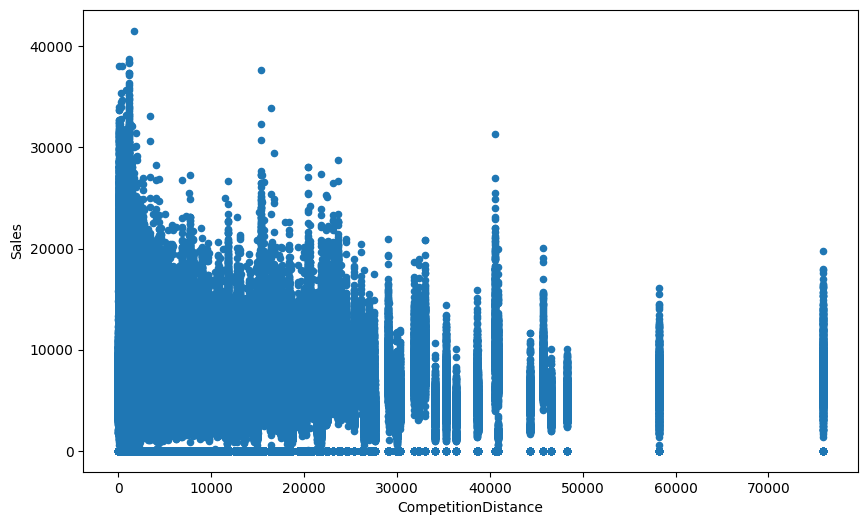

In [ ]:
combined_data.plot(x='CompetitionDistance',y='Sales',kind='scatter',figsize =(10,6))

## Finding Outliers

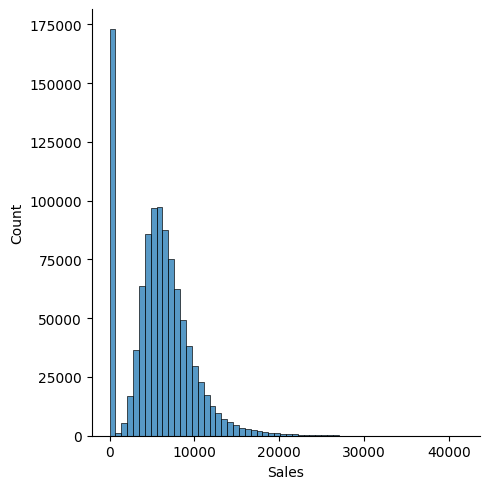

In [ ]:
sns.displot(combined_data,x='Sales',bins=60)

Total No.of outliers in dataset:  9731


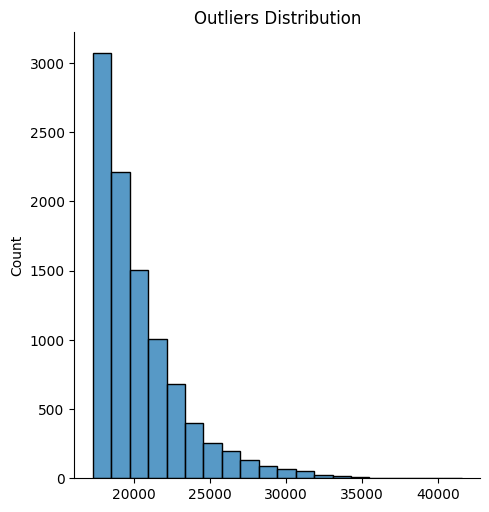

In [ ]:
mean_sales = np.mean(combined_data['Sales'])
std_sales = np.std(combined_data['Sales'])

threshold = 3

outliers = []
for i in combined_data['Sales']:
    z_score = (i-mean_sales)/std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total No.of outliers in dataset: ', len(outliers))

sns.displot(x=outliers,bins=20).set(title='Outliers Distribution')

In [ ]:
# Percentage of Outliers 
zero_sales = combined_data.loc[combined_data['Sales']==0]

sales_greater_than_25k = combined_data.loc[combined_data['Sales'] > 25000]

print('Length of the dataset:', len(combined_data))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(combined_data))*100))
print('Percentage of sales greater than 25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(combined_data))*100))

Length of the dataset: 1017209
Percentage of Zeros in dataset: 16.995%
Percentage of sales greater than 25k in dataset: 0.075% 


In [ ]:
combined_data.drop(combined_data.loc[combined_data['Sales'] > 25000].index,inplace=True)

In [ ]:
combined_data.shape

(1016451, 18)

## Converting Categorical Variable to Numeric

In [ ]:
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[0:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)

combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7


In [ ]:
combined_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
Year                           int64
Month                          int64
dtype: object

In [ ]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

<ipython-input-34-8bedefbc7859>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'


In [ ]:
# PromoInterval column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['PromoInterval'].loc[combined_data['PromoInterval'] == 0] = '0'


<ipython-input-35-d3700970de04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['PromoInterval'].loc[combined_data['PromoInterval'] == 0] = '0'


In [ ]:
combined_data['PromoInterval'].head()

0    0
1    0
2    0
3    0
4    0
Name: PromoInterval, dtype: object

In [ ]:
# encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

combined_data['StateHoliday'] = label_encoder.fit_transform(combined_data['StateHoliday'])
combined_data['PromoInterval'] = label_encoder.fit_transform(combined_data['PromoInterval'])

combined_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7


In [ ]:
combined_data = pd.get_dummies(combined_data)

In [ ]:
combined_data

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,...,SchoolHoliday,Year,Month,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,...,1,2015,7,0,0,1,0,1,0,0
1,1,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,...,1,2015,7,0,0,1,0,1,0,0
2,1,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,...,1,2015,7,0,0,1,0,1,0,0
3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,...,1,2015,7,0,0,1,0,1,0,0
4,1,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,...,1,2015,7,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,5350.0,9.0,2013.0,1,22.0,2012.0,3,6,4771,...,1,2013,1,0,0,0,1,0,0,1
1017205,1115,5350.0,9.0,2013.0,1,22.0,2012.0,3,5,4540,...,1,2013,1,0,0,0,1,0,0,1
1017206,1115,5350.0,9.0,2013.0,1,22.0,2012.0,3,4,4297,...,1,2013,1,0,0,0,1,0,0,1
1017207,1115,5350.0,9.0,2013.0,1,22.0,2012.0,3,3,3697,...,1,2013,1,0,0,0,1,0,0,1


In [ ]:
# Correlation
correlation = combined_data.corr()
correlation

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,...,SchoolHoliday,Year,Month,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Store,1.000000,-0.026302,-0.037453,-0.000058,0.008597,0.011117,0.008630,0.001996,0.000283,0.004597,...,0.000554,0.000302,0.001445,0.005182,0.002663,0.061051,-0.051445,-0.005970,0.019345,0.002487
CompetitionDistance,-0.026302,1.000000,-0.048701,0.020918,-0.140106,-0.123939,-0.140170,-0.129408,-0.000127,-0.017250,...,-0.003663,0.000664,0.003693,-0.037084,-0.070856,-0.098043,0.131418,-0.141198,-0.049927,0.150355
CompetitionOpenSinceMonth,-0.037453,-0.048701,1.000000,0.058225,0.021135,0.019334,0.021145,0.014308,-0.000099,-0.021271,...,0.000101,-0.000161,-0.000238,-0.030165,-0.000579,-0.028430,0.053735,-0.037163,0.021000,0.033414
CompetitionOpenSinceYear,-0.000058,0.020918,0.058225,1.000000,-0.022552,-0.027398,-0.022572,-0.025276,-0.000135,0.008423,...,0.001841,0.000627,0.003232,-0.035031,0.002581,-0.022842,0.054013,-0.091339,-0.007931,0.092867
Promo2,0.008597,-0.140106,0.021135,-0.022552,1.000000,0.759134,0.999999,0.905080,0.000075,-0.089049,...,-0.006892,-0.005095,-0.025138,-0.071922,-0.053090,-0.001536,0.092925,-0.006970,-0.012465,0.009226
Promo2SinceWeek,0.011117,-0.123939,0.019334,-0.027398,0.759134,1.000000,0.758948,0.678920,0.000168,-0.042564,...,-0.006679,-0.006235,-0.031097,-0.041672,-0.042694,-0.024873,0.074758,0.031813,-0.017867,-0.028624
Promo2SinceYear,0.008630,-0.140170,0.021145,-0.022572,0.999999,0.758948,1.000000,0.905143,0.000075,-0.089065,...,-0.006895,-0.005096,-0.025144,-0.071867,-0.053053,-0.001577,0.092886,-0.007021,-0.012427,0.009270
PromoInterval,0.001996,-0.129408,0.014308,-0.025276,0.905080,0.678920,0.905143,1.000000,0.000064,-0.083896,...,-0.006458,-0.004554,-0.022484,-0.077259,-0.048026,0.019196,0.082006,-0.038324,-0.011639,0.040465
DayOfWeek,0.000283,-0.000127,-0.000099,-0.000135,0.000075,0.000168,0.000075,0.000064,1.000000,-0.466665,...,-0.205405,0.001838,-0.005083,0.000414,-0.001182,-0.000095,-0.000061,-0.000094,-0.000034,0.000100
Sales,0.004597,-0.017250,-0.021271,0.008423,-0.089049,-0.042564,-0.089065,-0.083896,-0.466665,1.000000,...,0.086124,0.024545,0.047228,-0.011060,0.134023,-0.003872,-0.020944,-0.081952,0.066715,0.070003


<Axes: >

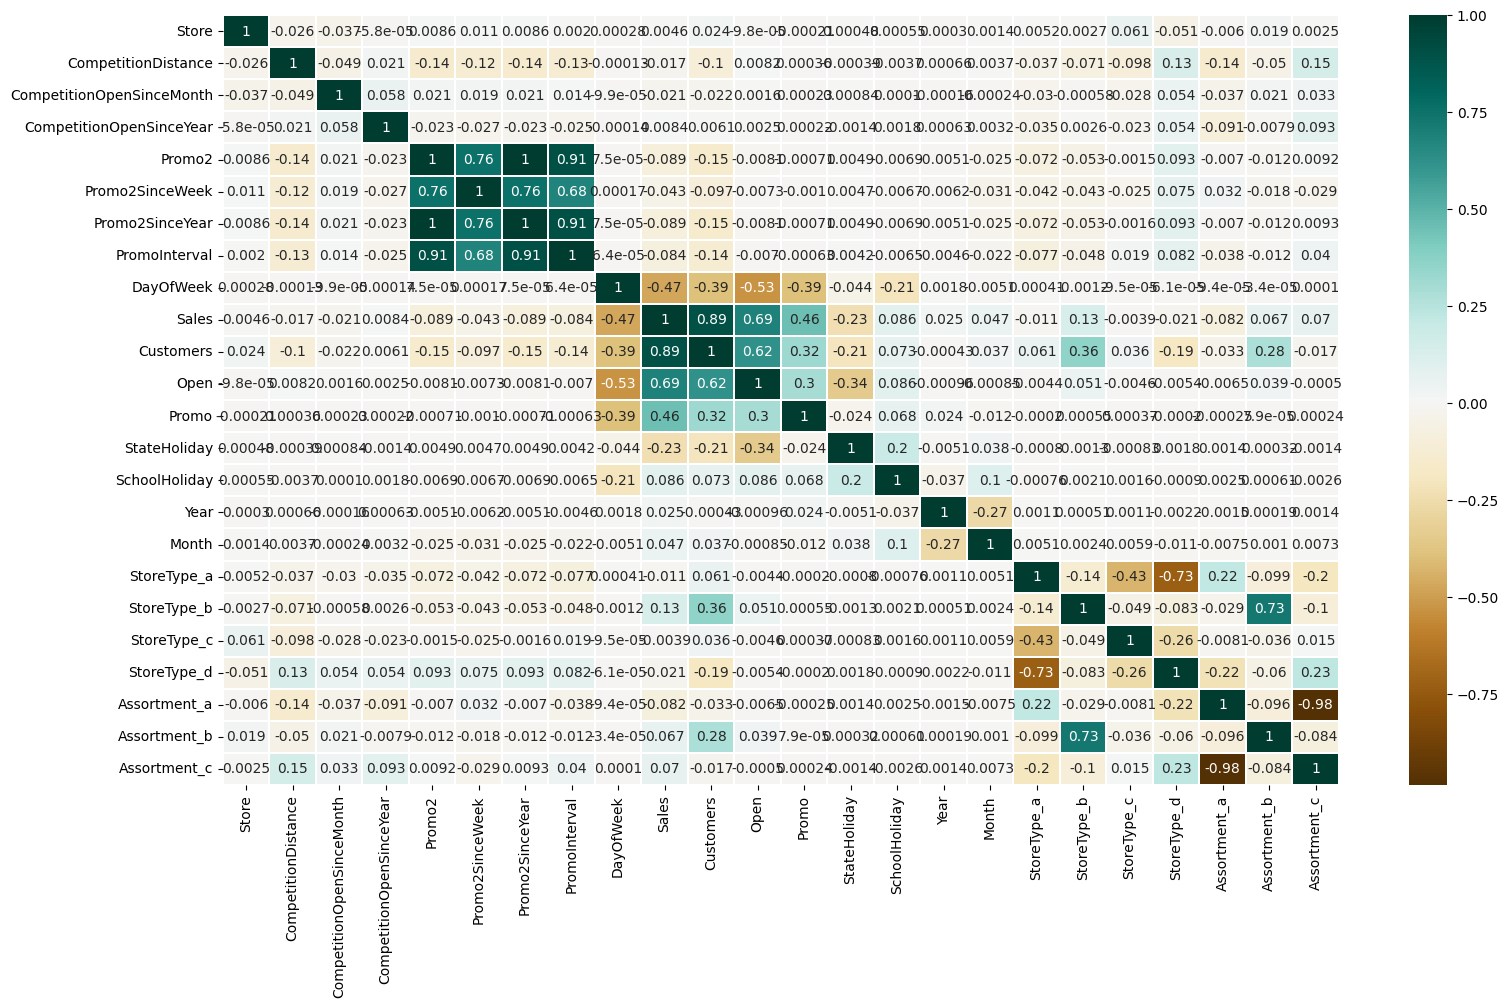

In [ ]:
# Heat Map
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BrBG')

In [ ]:
combined_data.columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'DayOfWeek', 'Sales', 'Customers',
       'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [ ]:
combined_data. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016451 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1016451 non-null  int64  
 1   CompetitionDistance        1016451 non-null  float64
 2   CompetitionOpenSinceMonth  1016451 non-null  float64
 3   CompetitionOpenSinceYear   1016451 non-null  float64
 4   Promo2                     1016451 non-null  int64  
 5   Promo2SinceWeek            1016451 non-null  float64
 6   Promo2SinceYear            1016451 non-null  float64
 7   PromoInterval              1016451 non-null  int64  
 8   DayOfWeek                  1016451 non-null  int64  
 9   Sales                      1016451 non-null  int64  
 10  Customers                  1016451 non-null  int64  
 11  Open                       1016451 non-null  int64  
 12  Promo                      1016451 non-null  int64  
 13  StateHoliday

In [ ]:
# Convert về số nguyên
combined_data['CompetitionOpenSinceMonth'] = combined_data['CompetitionOpenSinceMonth'].astype(int)
combined_data['CompetitionOpenSinceYear'] = combined_data['CompetitionOpenSinceYear'].astype(int)
combined_data['Promo2SinceWeek'] = combined_data['Promo2SinceWeek'].astype(int)
combined_data['Promo2SinceYear'] = combined_data['Promo2SinceYear'].astype(int)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016451 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1016451 non-null  int64  
 1   CompetitionDistance        1016451 non-null  float64
 2   CompetitionOpenSinceMonth  1016451 non-null  int64  
 3   CompetitionOpenSinceYear   1016451 non-null  int64  
 4   Promo2                     1016451 non-null  int64  
 5   Promo2SinceWeek            1016451 non-null  int64  
 6   Promo2SinceYear            1016451 non-null  int64  
 7   PromoInterval              1016451 non-null  int64  
 8   DayOfWeek                  1016451 non-null  int64  
 9   Sales                      1016451 non-null  int64  
 10  Customers                  1016451 non-null  int64  
 11  Open                       1016451 non-null  int64  
 12  Promo                      1016451 non-null  int64  
 13  StateHoliday

Kiểm tra đa cộng tuyến nhưng nó lạ lắm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# the independent variables set
X = combined_data[['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'DayOfWeek', 'Customers',
       'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c']]
  
# VIF dataframe
vif_data2 = pd.DataFrame()
vif_data2["Feature"] = X.columns
  
# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data2)

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                      Feature           VIF
0                       Store  1.009499e+00
1         CompetitionDistance  1.098409e+00
2   CompetitionOpenSinceMonth  1.014002e+00
3    CompetitionOpenSinceYear  1.015209e+00
4                      Promo2  7.996800e+05
5             Promo2SinceWeek  2.533219e+00
6             Promo2SinceYear  7.996391e+05
7               PromoInterval  5.674683e+00
8                   DayOfWeek  1.674958e+00
9                   Customers  2.358641e+00
10                       Open  2.385022e+00
11                      Promo  1.244832e+00
12               StateHoliday  1.283906e+00
13              SchoolHoliday  1.099240e+00
14                       Year  1.079390e+00
15                      Month  1.093796e+00
16                StoreType_a           inf
17                StoreType_b           inf
18                StoreType_c           inf
19                StoreType_d           inf
20               Assortment_a           inf
21               Assortment_b   

Phần đa cộng tuyến này đang làm nháp, kh ảnh hưởng đến bài

In [ ]:
combined_dataa = combined_data.drop(columns=[  'StoreType_d', 'Assortment_c'])

## Buliding a Regression Model

In [ ]:
combined_data_open = combined_data[combined_dataa['Open']==1]
combined_data_closed = combined_data[combined_dataa['Open']==0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

X_train, X_test, y_train, y_test_open = train_test_split(combined_data_open.drop(['Sales','Customers','Open'],axis=1),
                                                        combined_data_open['Sales'], test_size=0.2, random_state=23)

In [ ]:
X_train.columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [ ]:
y_test_closed = np.zeros(combined_data_closed.shape[0])
y_test = np.append(y_test_open, y_test_closed)

## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#After StandardScaler
X_train

array([[-1.01769291, -0.20827599,  0.79566079, ..., -1.05615835,
        -0.09898808,  1.07694293],
       [ 1.39101394, -0.20186044,  1.15564159, ..., -1.05615835,
        -0.09898808,  1.07694293],
       [-0.07285822, -0.24291998, -1.36422401, ...,  0.94682772,
        -0.09898808, -0.92855431],
       ...,
       [ 1.33506978, -0.69714113,  1.15564159, ...,  0.94682772,
        -0.09898808, -0.92855431],
       [ 1.53398235, -0.04917028,  0.43567999, ..., -1.05615835,
        -0.09898808,  1.07694293],
       [ 0.94656868,  2.04101689,  1.15564159, ..., -1.05615835,
        -0.09898808,  1.07694293]])

#**CHƯƠNG 4. KẾT QUẢ THỰC NGHIỆM VÀ ĐỀ XUẤT**

#4.1. Kết quả nghiên cứu

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def RMSPE(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe 

##4.1.1. KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 

### Tìm K tối ưu

In [ ]:
scoreListknn = [] 
for k in range(1,5):
  KNN = KNeighborsRegressor(n_neighbors=k, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
  KNN.fit(X_train, y_train)
  prediction_open = KNN.predict(X_test)
  prediction_closed = np.zeros(combined_data_closed.shape[0])
  y_predict = np.append(prediction_open,prediction_closed)  
  R2=r2_score(y_test,y_predict)
  scoreListknn.append(R2)

In [ ]:
for k in range(5,10):
  KNN = KNeighborsRegressor(n_neighbors=k, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
  KNN.fit(X_train, y_train)
  prediction_open = KNN.predict(X_test)
  prediction_closed = np.zeros(combined_data_closed.shape[0])
  y_predict = np.append(prediction_open,prediction_closed)  
  R2=r2_score(y_test,y_predict)
  scoreListknn.append(R2)

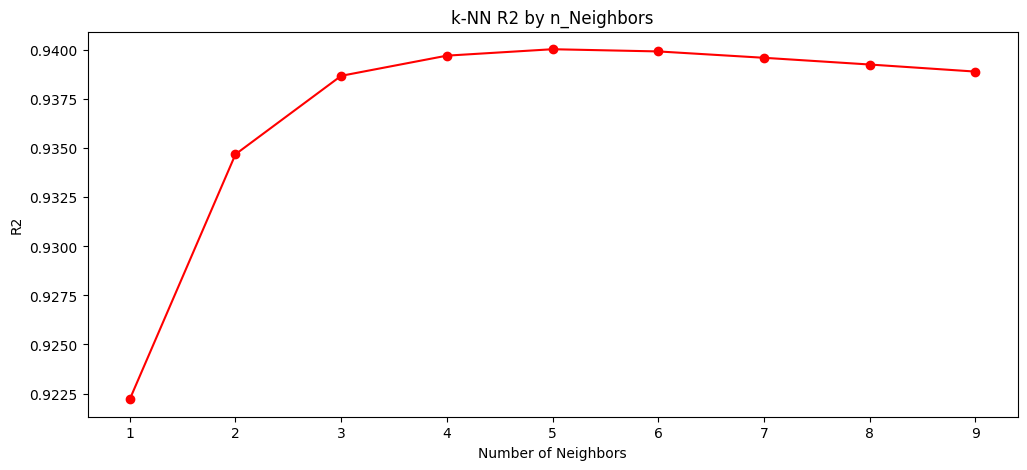

[0.922209453499858,
 0.9346956069152281,
 0.9386947069478367,
 0.9397231209213649,
 0.9400508510439197,
 0.939938372312557,
 0.9396144212714942,
 0.9392717221277109,
 0.9389110667802606]

In [ ]:
#Trực quan hóa kết quả đánh giá mô hình khi thay đổi K
plt.figure(figsize=(12,5))
plt.plot(range(1,10), scoreListknn,c='red',marker='o')
plt.xticks(np.arange(1,10,1))
plt.xlabel("k value")
plt.ylabel("Score")
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.title('k-NN R2 by n_Neighbors')
plt.show()
scoreListknn

Từ biểu đồ ta thấy khi K=5 mô hình hoạt động tốt nhất và có xu hướng đi xuống, vì vậy ta sẽ chọn k=5 để tiếp tục điều chỉnh mô hình

In [ ]:
KNN_original = KNeighborsRegressor(n_neighbors=5, algorithm='auto', leaf_size=30, p=2, metric='minkowski')
KNN_original.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
prediction_open = KNN_original.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [ ]:
print('r2_score in testing data:',r2_score(y_test,y_predict))


r2_score in testing data: 0.9307036485422675


In [ ]:
 print('RMPSE in testing data:',RMSPE(y_test, y_predict))

RMPSE in testing data: 0.2317600892601289


In [ ]:
print('MAE: ',"{:,.15f}".format(metrics.mean_absolute_error(y_test, y_predict)))
print('MSE: ',"{:,.15f}".format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE:  487.238095238095298
MSE:  1,149,970.281460895435885
RMSE: 1072.3666730465357


###Thêm trọng số

In [ ]:
KNN_original = KNeighborsRegressor(n_neighbors=5, algorithm='auto', leaf_size=30, p=2, metric='minkowski', weights='distance')
KNN_original.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
prediction_open = KNN_original.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [ ]:
 print('RMPSE in testing data:',RMSPE(y_test, y_predict))

RMPSE in testing data: 0.23253306852736833


In [ ]:
print('r2_score in testing data:',r2_score(y_test,y_predict))


r2_score in testing data: 0.9400508510439197


In [ ]:
print('MAE: ',"{:,.15f}".format(metrics.mean_absolute_error(y_test, y_predict)))
print('MSE: ',"{:,.15f}".format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE:  460.885002978934779
MSE:  994,853.816227463656105
RMSE: 997.4235891673425


Từ kết quả ta có thể thấy, khi đặt trọng số thì mô hình hoạt động tốt hơn cụ thể R2 từ 0.8418 lên 0.9401

###Thay đổi chiều dữ liệu

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scoreListknn = [] 
#Áp dụng PCA với số chiều 1-16
from sklearn.decomposition import PCA
for k in range(1,22):
  pca = PCA(n_components = k)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  explained_variance = pca.explained_variance_ratio_
  KNN = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
  KNN.fit(X_train_pca, y_train)
  prediction_open = KNN.predict(X_test_pca)
  prediction_closed = np.zeros(combined_data_closed.shape[0])
  y_predict = np.append(prediction_open,prediction_closed)
  R2=r2_score(y_test,y_predict)
  scoreListknn.append(R2)

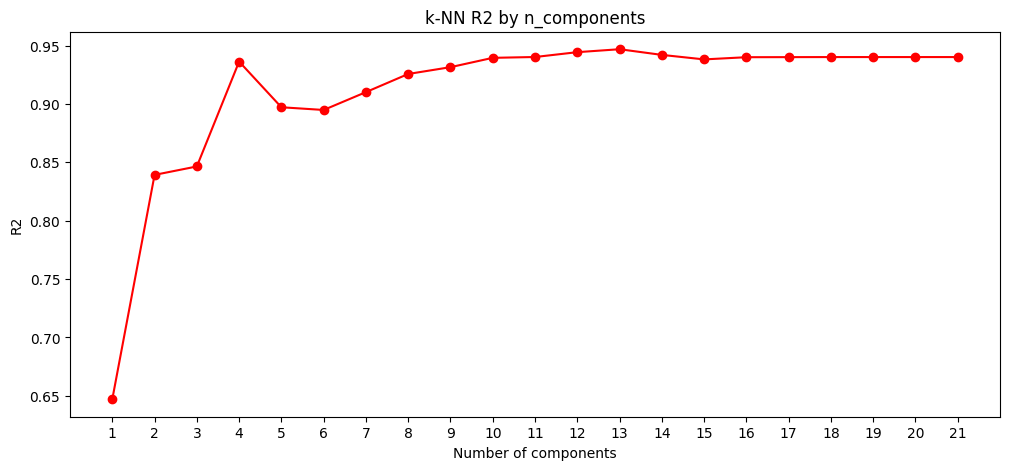

[0.6470969816435441,
 0.8391989382258638,
 0.8464255827193293,
 0.936233562976106,
 0.8971177062798681,
 0.8947972016136345,
 0.9100846419094534,
 0.9256207917441234,
 0.9314540161985926,
 0.9394388958076754,
 0.9401523644442702,
 0.9442904981595703,
 0.9468156972189625,
 0.9419625229609322,
 0.9381001264052246,
 0.9399778010485654,
 0.940040482073543,
 0.940096110097673,
 0.9400992286605514,
 0.9400992286605514,
 0.9400992286605514]

In [ ]:
#Trực quan hóa kết quả đánh giá mô hình khi thay đổi chiều dữ liệu
plt.figure(figsize=(12,5))
plt.plot(range(1,22), scoreListknn,c='red',marker='o')
plt.xticks(np.arange(1,22,1))
plt.xlabel('Number of components')
plt.ylabel('R2')
plt.title('k-NN R2 by n_components')
plt.show()
#in giá trị R2 
scoreListknn

Từ biểu đồ ta thấy, tại n_component=13 mô hình tăng từ 0,9401 lên 0,9468



In [ ]:
  pca13 = PCA(n_components = 13)
  X_train_pca13 = pca13.fit_transform(X_train)
  X_test_pca13 = pca13.transform(X_test)
  explained_variance = pca13.explained_variance_ratio_
  KNN = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
  KNN.fit(X_train_pca13, y_train)
  prediction_open = KNN.predict(X_test_pca13)
  prediction_closed = np.zeros(combined_data_closed.shape[0])
  y_predict = np.append(prediction_open,prediction_closed)

In [ ]:
print('r2_score in training data:',KNN.score(X_train_pca13, y_train))

r2_score in training data: 0.9639713714600899


In [ ]:
print('r2_score in testing data:',r2_score(y_test,y_predict))

r2_score in testing data: 0.9467745673700014


In [ ]:
 print('RMPSE in testing data:',RMSPE(y_test, y_predict))

RMPSE in testing data: 0.22318051214960927


In [ ]:
print('MAE: ',"{:,.15f}".format(metrics.mean_absolute_error(y_test, y_predict)))
print('MSE: ',"{:,.15f}".format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE:  441.651308398020547
MSE:  883,274.002957157325000
RMSE: 939.826581320808


## 4.1.2. Linear Regression

### Mô hình thô

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
# tạo đối tượng hồi quy tuyến tính
saleLinear = LinearRegression() 

In [ ]:
# huấn luyện mô hình bằng tập huấn luyện
saleLinear.fit(X_train, y_train) 

LinearRegression()

In [ ]:
# hệ số hồi quy
saleLinear.coef_.round(3)

array([ 1.58980000e+01, -1.78246000e+02, -1.07431000e+02, -5.92900000e+00,
        4.29725320e+04,  2.96792000e+02, -4.34251900e+04, -1.50337000e+02,
       -2.52369000e+02,  1.06716800e+03, -6.03200000e+00,  2.97760000e+01,
        1.53579000e+02,  2.48359000e+02, -5.85124680e+13, -1.57157896e+13,
       -3.99629828e+13, -5.41461245e+13, -7.36672493e+15, -1.44644032e+15,
       -7.35750072e+15])

In [ ]:
#hệ số chặn
saleLinear.intercept_.round(3)

6937.121

In [ ]:
prediction_open_linear = saleLinear.predict(X_test)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def RMSPE(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe 

In [ ]:
# Performance of the model
R2_train_linear = saleLinear.score(X_train,y_train)
R2_linear = r2_score(y_test,y_predict_linear)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear))

In [ ]:
print("R2 in training data: ", R2_train_linear)
print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))
print('R bỉnh phương được hiệu chỉnh là:',round((1 - (1-saleLinear.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),3))

R2 in training data:  0.21721974680640443
R2 in test data:  0.7842788134831783
MAE:  984.2487711607647
MSE:  3579884.7754219854
RMSE: 1892.058343556558
RMSPE:  0.34173537896224254
R bỉnh phương được hiệu chỉnh là: 0.217


### Gradient Descent

In [ ]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost


def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.02,epochs=15000)

Cost is: 27672692.35914269
Cost is: 3616120.4585038032
Cost is: 3616119.9701832803
Cost is: 3616119.925755023
Cost is: 3616119.8816972873
Cost is: 3616119.837641504
Cost is: 3616119.793587363
Cost is: 3616119.7495348663
Cost is: 3616119.7054840107
Cost is: 3616119.6614347985


In [ ]:
w

array([  14.27587669, -173.86038504, -107.1534809 ,   -5.06286211,
       -217.79836164,  314.37901323, -234.22067852, -164.17005009,
       -253.56887273, 1066.6950191 ,   -5.45452012,   29.31312482,
        152.41043566,  248.0015649 ,  -31.20252671,  619.57361578,
        -45.66864557, -112.40502477, -190.75310015, -281.93220757,
        246.41842386])

In [ ]:
b

6936.608734240383

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b

In [ ]:
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [ ]:
r2score(y_predict_linear2, y_test)

0.784230691996832

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

In [ ]:
print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.784230691996832
MAE:  984.3901892879626
MSE:  3580683.349633091
RMSE: 1892.2693649776954
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.005,epochs=15000)

Cost is: 28423486.516196482
Cost is: 3617247.8915700335
Cost is: 3616149.5259817955
Cost is: 3616122.8558303355
Cost is: 3616120.463021424
Cost is: 3616120.0788767715
Cost is: 3616120.0048044794
Cost is: 3616119.9830549266
Cost is: 3616119.9702113043
Cost is: 3616119.9588848604


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b

In [ ]:
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

In [ ]:
print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.7842306711090751
MAE:  984.3902448112756
MSE:  3580683.696264614
RMSE: 1892.2694565691784
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.2,epochs=15000)

Cost is: 19584193.05530031
Cost is: 3616119.6171229254
Cost is: 3616119.176737654
Cost is: 3616118.7365166065
Cost is: 3616118.296459715
Cost is: 3616117.85656692
Cost is: 3616117.4168381635
Cost is: 3616116.977273381
Cost is: 3616116.5378725133
Cost is: 3616116.098635498


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b

In [ ]:
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.784230891690211
MAE:  984.3895200733909
MSE:  3580680.0357291647
RMSE: 1892.2684893347362
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.5,epochs=15000)

Cost is: 9881947.880396264
Cost is: 3616118.9561662828
Cost is: 3616117.856126905
Cost is: 3616116.757112752
Cost is: 3616115.6591228712
Cost is: 3616114.562156304
Cost is: 3616113.466212098
Cost is: 3616112.3712893035
Cost is: 3616111.277386964
Cost is: 3616110.184504132


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.7842312228949748
MAE:  984.3884097171924
MSE:  3580674.539398875
RMSE: 1892.2670370216977
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.5,epochs=5000)

Cost is: 9881947.880396264
Cost is: 3616119.6900959117
Cost is: 3616119.32307407
Cost is: 3616118.9561662828
Cost is: 3616118.5893725175
Cost is: 3616118.2226927374
Cost is: 3616117.856126905
Cost is: 3616117.489674988
Cost is: 3616117.12333695
Cost is: 3616116.757112752


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.7842308547650095
MAE:  984.3896439139885
MSE:  3580680.64850146
RMSE: 1892.2686512494624
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.55,epochs=5000)

Cost is: 8724110.298939444
Cost is: 3616119.6533151744
Cost is: 3616119.249609989
Cost is: 3616118.846042801
Cost is: 3616118.4426135668
Cost is: 3616118.039322234
Cost is: 3616117.636168761
Cost is: 3616117.2331530987
Cost is: 3616116.8302751975
Cost is: 3616116.427535015


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.7842308732307475
MAE:  984.3895819868424
MSE:  3580680.34206325
RMSE: 1892.2685702783444
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.59,epochs=10000)

Cost is: 7892304.908728167
Cost is: 3.366935454950993e+95
Cost is: 1.5216665752571216e+186
Cost is: 6.87708213369501e+276
Cost is: inf
Cost is: inf
Cost is: inf


<ipython-input-64-9ce8a19b2b3b>:16: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate*weight_gradient


Cost is: 0.0
Cost is: 0.0
Cost is: 0.0


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.561,epochs=10000)

Cost is: 8486993.196822906
Cost is: 17430782196.02004
Cost is: 4960258004533293.0
Cost is: 1.4118279086372028e+21
Cost is: 4.0184563852088454e+26
Cost is: 1.1437648753815636e+32
Cost is: 3.255474154134732e+37
Cost is: 9.265988313117607e+42
Cost is: 2.6373589638173017e+48
Cost is: 7.50665991471269e+53


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  -1.2561230964179776e+52
MAE:  3.1349913832035148e+29
MSE:  2.0845314368656074e+59
RMSE: 4.565666913897254e+29
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.552,epochs=10000)

Cost is: 8680525.77517985
Cost is: 3616119.2466715216
Cost is: 3616118.436743588
Cost is: 3616117.6273712893
Cost is: 3616116.818554245
Cost is: 3616116.0102920695
Cost is: 3616115.2025843896
Cost is: 3616114.3954308177
Cost is: 3616113.5888309795
Cost is: 3616112.782784488


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.7842310774134418
MAE:  984.3888972302915
MSE:  3580676.953659308
RMSE: 1892.267674949638
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.554,epochs=10000)

Cost is: 8637151.172920154
Cost is: 3616119.2437330587
Cost is: 3616118.430873638
Cost is: 3616117.6185738817
Cost is: 3616116.806833407
Cost is: 3616115.995651826
Cost is: 3616115.1850287532
Cost is: 3616114.374963807
Cost is: 3616113.565456601
Cost is: 3616112.7565067518


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842310788849032
MAE:  984.3888922948368
MSE:  3580676.9292404642
RMSE: 1892.2676684973678
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.556,epochs=15000)

Cost is: 8593986.492160352
Cost is: 3616118.8328286745
Cost is: 3616117.6097765416
Cost is: 3616116.3879918787
Cost is: 3616115.1674733786
Cost is: 3616113.948219723
Cost is: 3616112.7302296045
Cost is: 3616111.513501708
Cost is: 3616110.298034733
Cost is: 3616109.083827368


In [ ]:
w

array([ 1.42837941e+01, -1.73876660e+02, -1.07151230e+02, -5.06853142e+00,
       -4.99231954e-01,  3.14284145e+02, -4.51514405e+02, -1.64098034e+02,
       -2.53568869e+02,  1.06669470e+03, -5.45438392e+00,  2.93125277e+01,
        1.52409164e+02,  2.47998767e+02, -3.11934321e+01,  6.19579513e+02,
       -4.56800524e+01, -1.12408145e+02, -1.90758781e+02, -2.81929174e+02,
        2.46423516e+02])

In [ ]:
b

6936.608734240404

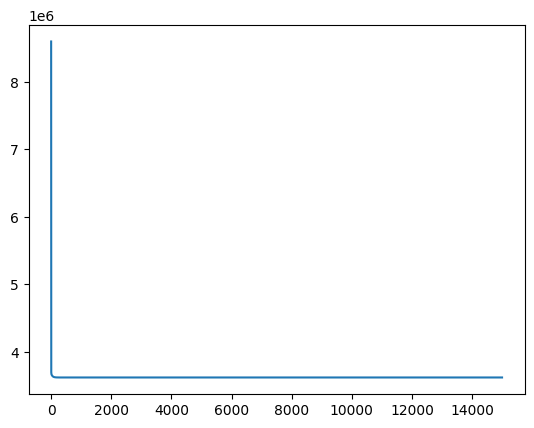

In [ ]:
plt.plot(c)

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

In [ ]:
R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842312844967008
MAE:  984.3882032119496
MSE:  3580673.5171206086
RMSE: 1892.266766901699
RMSPE:  0.3417487722952397


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.01,epochs=15000)

Cost is: 28171909.787804186
Cost is: 3616149.3681363505
Cost is: 3616120.46151125
Cost is: 3616120.0047414163
Cost is: 3616119.9702019524
Cost is: 3616119.9478095593
Cost is: 3616119.9257697137
Cost is: 3616119.9037404913
Cost is: 3616119.881711973
Cost is: 3616119.8596838755


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear))

R2 in test data:  0.7842306808807438
MAE:  984.3902265033086
MSE:  3580683.5341041475
RMSE: 1892.2694137210344
RMSPE:  0.34173537896224254


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.0002,epochs=10000)

Cost is: 28666234.513872482
Cost is: 20353666.929674145
Cost is: 14822995.103736559
Cost is: 11130670.202696709
Cost is: 8661313.685691215
Cost is: 7007985.344620724
Cost is: 5900004.9456931455
Cost is: 5156838.51770573
Cost is: 4657901.091216468
Cost is: 4322574.929005483


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7557742365548483
MAE:  989.5678772532584
MSE:  4052917.130858321
RMSE: 2013.1858162768585
RMSPE:  0.28181962954367934


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.2,epochs=5000)

Cost is: 19584193.05530031
Cost is: 3616119.910804391
Cost is: 3616119.7639545174
Cost is: 3616119.6171229254
Cost is: 3616119.470309586
Cost is: 3616119.3235144955
Cost is: 3616119.176737654
Cost is: 3616119.0299790623
Cost is: 3616118.8832387123
Cost is: 3616118.7365166065


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842307438392822
MAE:  984.3900156789888
MSE:  3580682.48930963
RMSE: 1892.2691376518378
RMSPE:  0.3417488445778155


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.57,epochs=5000)

Cost is: 8297711.528838903
Cost is: 1.6401266362836774e+21
Cost is: 4.1253291448148425e+37
Cost is: 1.0376235698250617e+54
Cost is: 2.609883078080732e+70
Cost is: 6.564509403348095e+86
Cost is: 1.6511384769901113e+103
Cost is: 4.1530266813338415e+119
Cost is: 1.0445901937499709e+136
Cost is: 2.6274058815537253e+152


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  -3.648122978110873e+161
MAE:  1.6894875116573868e+84
MSE:  6.054046020736046e+168
RMSE: 2.4604971084591922e+84
RMSPE:  4.677354954729386e+80


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.559,epochs=5000)

Cost is: 8529633.07383296
Cost is: 3641822.86940393
Cost is: 3627064.385791252
Cost is: 3620779.576231041
Cost is: 3618103.093597753
Cost is: 3616963.1373317405
Cost is: 3616477.4769470184
Cost is: 3616270.434086515
Cost is: 3616182.0344235315
Cost is: 3616144.156426108


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842294806751243
MAE:  984.3663978761404
MSE:  3580703.451470142
RMSE: 1892.2746765388322
RMSPE:  0.3417072374863277


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.1,epochs=5000)

Cost is: 23867882.279759042
Cost is: 3616119.988019697
Cost is: 3616119.9109512568
Cost is: 3616119.837524018
Cost is: 3616119.7641013674
Cost is: 3616119.690683285
Cost is: 3616119.617269762
Cost is: 3616119.543860804
Cost is: 3616119.470456407
Cost is: 3616119.397056576


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842307068139723
MAE:  984.3901396776918
MSE:  3580683.1037432197
RMSE: 1892.2693000054776
RMSPE:  0.3417488496084744


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.02,epochs=50000)

Cost is: 27672692.35914269
Cost is: 3616119.9110687496
Cost is: 3616119.7642188487
Cost is: 3616119.61738723
Cost is: 3616119.470573866
Cost is: 3616119.3237787527
Cost is: 3616119.1770018884
Cost is: 3616119.030243269
Cost is: 3616118.8835028945
Cost is: 3616118.736780763


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842307438392779
MAE:  984.390015679001
MSE:  3580682.4893096993
RMSE: 1892.2691376518562
RMSPE:  0.34174884457781435


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.556,epochs=100000)

Cost is: 8593986.492160352
Cost is: 3616111.9189375076
Cost is: 3616103.8367858087
Cost is: 3616095.810308329
Cost is: 3616087.8391215447
Cost is: 3616079.9228445916
Cost is: 3616072.061099218
Cost is: 3616064.2535097837
Cost is: 3616056.499703226
Cost is: 3616048.7993090674


In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842346397551584
MAE:  984.376946926557
MSE:  3580617.8367358292
RMSE: 1892.2520542295176
RMSPE:  0.34174837499343264


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.556,epochs=900000)

Cost is: 8593986.492160352
Cost is: 3616048.7993090674
Cost is: 3615981.8394388487
Cost is: 3615918.91830362
Cost is: 3615859.7923040404
Cost is: 3615804.2325336444
Cost is: 3615752.0238926336
Cost is: 3615702.9642551155
Cost is: 3615656.863686576
Cost is: 3615613.5437085396


In [ ]:
w

array([ 1.47002157e+01, -1.74732672e+02, -1.07032819e+02, -5.36671200e+00,
        1.14284572e+04,  3.09294501e+02, -1.18801866e+04, -1.60310286e+02,
       -2.53568680e+02,  1.06667811e+03, -5.44722032e+00,  2.92811234e+01,
        1.52342285e+02,  2.47851618e+02, -3.07150989e+01,  6.19889673e+02,
       -4.62800017e+01, -1.12572277e+02, -1.91057595e+02, -2.81769640e+02,
        2.46691340e+02])

In [ ]:
b

6936.608734240404

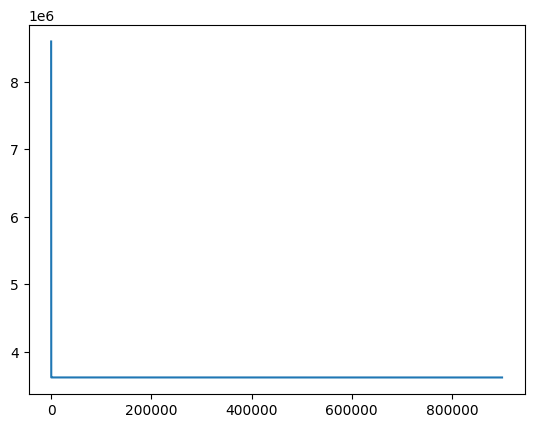

In [ ]:
plt.plot(c)

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
prediction_open_linear = predict(X_test, w, b)
prediction_closed_linear = np.zeros(combined_data_closed.shape[0])
y_predict_linear2 = np.append(prediction_open_linear,prediction_closed_linear)

R2_linear = r2_score(y_test,y_predict_linear2)
MAE_linear = metrics.mean_absolute_error(y_test,y_predict_linear2)
MSE_linear = metrics.mean_squared_error(y_test,y_predict_linear2)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test,y_predict_linear2))

print("R2 in test data: ", R2_linear)
print('MAE: ',MAE_linear)
print('MSE: ',MSE_linear)
print('RMSE:',RMSE_linear)
print('RMSPE: ', RMSPE(y_test, y_predict_linear2))

R2 in test data:  0.7842575321431153
MAE:  984.2987440998945
MSE:  3580237.9384400547
RMSE: 1892.1516689842954
RMSPE:  0.3417489957429222


In [ ]:
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.556,epochs=2500000)

Cost is: 8593986.492160352
Cost is: 3615932.564463058


In [ ]:
correlations = combined_data_open.drop(['Customers','Open'],axis=1).corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.181738
Promo2SinceYear             -0.125911
Promo2                      -0.125886
PromoInterval               -0.119290
Assortment_a                -0.116823
Promo2SinceWeek             -0.056701
CompetitionDistance         -0.034005
CompetitionOpenSinceMonth   -0.033747
StoreType_d                 -0.026050
StoreType_a                 -0.012072
StoreType_c                 -0.001078
Store                        0.007035
CompetitionOpenSinceYear     0.010111
StateHoliday                 0.014028
Year                         0.037990
SchoolHoliday                0.039528
Assortment_b                 0.055543
Month                        0.072109
Assortment_c                 0.106033
StoreType_b                  0.137502
Promo                        0.373611
Sales                        1.000000
Name: Sales, dtype: float64

##**4.1.3 Decision Tree**

###Mô hình thô

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
# create a regressor object
dtree = DecisionTreeRegressor(random_state = 0) 

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
prediction_open_decisiontree = dtree.predict(X_test)
prediction_closed_decisiontree = np.zeros(combined_data_closed.shape[0])

In [ ]:
y_predict_decisiontree = np.append(prediction_open_decisiontree,prediction_closed_decisiontree)

In [ ]:
from sklearn import metrics 
R2_train_dtree = dtree.score(X_train,y_train)
R2_dtree = r2_score(y_test,y_predict_decisiontree)
MAE_dtree = metrics.mean_absolute_error(y_test,y_predict_decisiontree)
MSE_dtree = metrics.mean_squared_error(y_test,y_predict_decisiontree)
RMSE_dtree = np.sqrt(metrics.mean_squared_error(y_test,y_predict_decisiontree))

In [ ]:
print("R2 in training data: ", R2_train_dtree)
print("R2 in test data: ", R2_dtree)
print('MAE: ',MAE_dtree)
print('MSE: ',MSE_dtree)
print('RMSE:',RMSE_dtree)
print('RMSPE: ', RMSPE(y_test, y_predict_decisiontree))

R2 in training data:  0.9639683306788563
R2 in test data:  0.9515685306466164
MAE:  419.85406380046703
MSE:  803718.3671617471
RMSE: 896.5034116843879
RMSPE:  0.180575137303045


###Điều chỉnh một số thông số

#### Tunning by GridSearchCV

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid of parameters to choose from

parameters = {'max_depth': [3000, 4000, 5000, 6000, 7000], 
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 10,15,20],
              'max_leaf_nodes' : [10000, 11000, 12000, 13000, 14000, 15000],
              }

In [ ]:
dtree = DecisionTreeRegressor(random_state = 42) 

In [ ]:
grid = GridSearchCV(dtree,parameters, scoring='r2')

In [ ]:
model = grid.fit(X_train,y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'max_depth': 3000, 'max_leaf_nodes': 15000, 'min_samples_leaf': 5} 

DecisionTreeRegressor(max_depth=3000, max_leaf_nodes=15000, min_samples_leaf=5,
                      random_state=42) 



####Tìm max_features phù hợp

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics
R2s_train = []
R2s_test = []
MAEs = []
MSEs = []
RMSEs = []
features = ['sqrt', 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 19, 21]
for i in features:
    dtree = DecisionTreeRegressor(max_depth=3000, random_state=42, min_samples_leaf=5, max_leaf_nodes=15000, max_features=i)
    dtree.fit(X_train, y_train)

    prediction_open_decisiontree = dtree.predict(X_test)
    prediction_closed_decisiontree = np.zeros(combined_data_closed.shape[0])
    regressor_y_pred = np.append(prediction_open_decisiontree,prediction_closed_decisiontree)
    
    R2_train_Forest = dtree.score(X_train,y_train)
    R2_Forest = r2_score(y_test,regressor_y_pred)
    MAE_Forest = metrics.mean_absolute_error(y_test,regressor_y_pred)
    MSE_Forest = metrics.mean_squared_error(y_test,regressor_y_pred)
    RMSE_Forest = np.sqrt(metrics.mean_squared_error(y_test,regressor_y_pred))
    
    R2s_train.append(R2_train_Forest)
    R2s_test.append(R2_Forest)
    
    print('Max_features = ', i)
    print("R2 in training data: ", R2_train_Forest)
    print("R2 in test data: ", R2_Forest)
    print('MAE: ', MAE_Forest)
    print('MSE: ', MSE_Forest)
    print('RMSE:', RMSE_Forest)

Max_features =  sqrt
R2 in training data:  0.7624967285319454
R2 in test data:  0.9277075425857618
MAE:  528.7062691289739
MSE:  1199690.5443262649
RMSE: 1095.3038593587921
Max_features =  4
R2 in training data:  0.7624967285319454
R2 in test data:  0.9277075425857618
MAE:  528.7062691289739
MSE:  1199690.5443262649
RMSE: 1095.3038593587921
Max_features =  5
R2 in training data:  0.8065019310686654
R2 in test data:  0.9399356525710162
MAE:  469.2033840734421
MSE:  996765.530445052
RMSE: 998.3814553791811
Max_features =  6
R2 in training data:  0.8474658444547516
R2 in test data:  0.9517205000129669
MAE:  422.5769926641435
MSE:  801196.4413847134
RMSE: 895.0957721856994
Max_features =  7
R2 in training data:  0.8654812791556751
R2 in test data:  0.9560216850254644
MAE:  402.5058969996184
MSE:  729818.441888534
RMSE: 854.2941190764069
Max_features =  8
R2 in training data:  0.8752474282749176
R2 in test data:  0.958706936224716
MAE:  390.1620907935641
MSE:  685256.8017381122
RMSE: 827.80

Text(0.5, 1.0, 'Model Evaluation by Max_features')

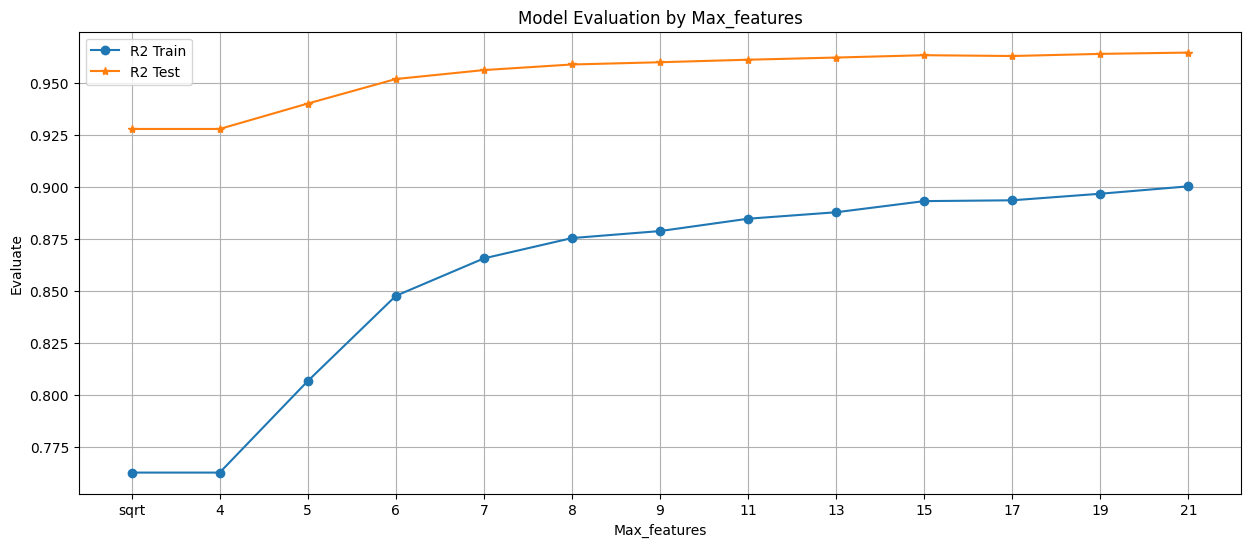

In [ ]:
#Kiem tra overfitting
plt.figure(figsize = (15,6))
plt.plot(features, R2s_train, label='R2 Train', marker = 'o')
plt.plot(features, R2s_test, label='R2 Test', marker = '*')
plt.xlabel('Max_features')
plt.ylabel('Evaluate')
plt.legend()
plt.grid()
plt.title('Model Evaluation by Max_features')

###Mô hình có điều chỉnh thông số

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
# create a regressor object
dtree = DecisionTreeRegressor(random_state = 42, max_depth = 3000, max_leaf_nodes = 15000, min_samples_leaf = 5, max_features = 15) 

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3000, max_features=15, max_leaf_nodes=15000,
                      min_samples_leaf=5, random_state=42)

In [ ]:
prediction_open_decisiontree = dtree.predict(X_test)
prediction_closed_decisiontree = np.zeros(combined_data_closed.shape[0])
y_predict_decisiontree = np.append(prediction_open_decisiontree,prediction_closed_decisiontree)

In [ ]:
from sklearn import metrics 
R2_train_dtree = dtree.score(X_train,y_train)
R2_dtree = r2_score(y_test,y_predict_decisiontree)
MAE_dtree = metrics.mean_absolute_error(y_test,y_predict_decisiontree)
MSE_dtree = metrics.mean_squared_error(y_test,y_predict_decisiontree)
RMSE_dtree = np.sqrt(metrics.mean_squared_error(y_test,y_predict_decisiontree))

In [ ]:
# error = rmspe(y_test, predTree)
print("R2 in training data: ", R2_train_dtree)
print("R2 in test data: ", R2_dtree)
print('MAE: ',MAE_dtree)
print('MSE: ',MSE_dtree)
print('RMSE:',RMSE_dtree)
print('RMSPE: ', RMSPE(y_test, y_predict_decisiontree))

R2 in training data:  0.8930158622068994
R2 in test data:  0.9631723412467204
MAE:  364.9851298074085
MSE:  611153.5775139137
RMSE: 781.7631211012155
RMSPE:  0.11078514717434555


In [ ]:
# decision tree for feature importance on a regression problem
# from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define the model
dtree = DecisionTreeRegressor()
# fit the model
dtree.fit(X_train, y_train)

# get importance
importance = dtree.feature_importances_

df = combined_data_open.drop(['Sales','Customers','Open'], axis=1)
dtree_importance = pd.DataFrame(importance, index = df.columns).reset_index()
dtree_importance.columns = ['Feature' , 'Importance']

In [ ]:
# Decision Tree
dtree_importance.sort_values(by=['Importance'], ascending=False)

,Feature,Importance
1,CompetitionDistance,0.198299
0,Store,0.164238
9,Promo,0.144933
8,DayOfWeek,0.077947
3,CompetitionOpenSinceYear,0.074483
2,CompetitionOpenSinceMonth,0.071056
13,Month,0.058147
6,Promo2SinceYear,0.040562
5,Promo2SinceWeek,0.030060
15,StoreType_b,0.026183


##4.1.4. Random Forest

###Mô hình thô

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
prediction_open = reg.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict_reg = np.append(prediction_open,prediction_closed)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
R2_train_Forest_raw = reg.score(X_train,y_train)
R2_Forest_raw = r2_score(y_test,y_predict_reg)
MAE_Forest_raw = metrics.mean_absolute_error(y_test,y_predict_reg)
MSE_Forest_raw = metrics.mean_squared_error(y_test,y_predict_reg)
RMSE_Forest_raw = np.sqrt(metrics.mean_squared_error(y_test,y_predict_reg))
RMSPE_Forest_raw = RMSPE(y_test, y_predict_reg)

print("R2 in test data: ", R2_Forest_raw)
print("R2 in training data: ", R2_train_Forest_raw)
print('MAE: ', MAE_Forest_raw)
print('MSE: ', MSE_Forest_raw)
print('RMSE:', RMSE_Forest_raw)
print('RMSPE: ', RMSPE_Forest_raw)

R2 in test data:  0.9652749579165507
R2 in training data:  0.9581272901136981
MAE:  356.6870206604133
MSE:  576260.7349219919
RMSE: 759.118393218075
RMSPE:  0.1255416568838386


In [ ]:
feature_scores = pd.DataFrame(reg.feature_importances_, index=combined_data_open.drop(['Sales','Customers','Open'], axis = 1).columns).reset_index()
feature_scores.columns = ["Feature", "Importance"]
feature_scores = feature_scores.sort_values(by=["Importance"], ascending=True)
feature_scores.sort_values(by=["Importance"], ascending=False)

,Feature,Importance
1,CompetitionDistance,0.195397
0,Store,0.161817
9,Promo,0.143197
8,DayOfWeek,0.079179
2,CompetitionOpenSinceMonth,0.074111
3,CompetitionOpenSinceYear,0.072461
13,Month,0.062088
6,Promo2SinceYear,0.041549
5,Promo2SinceWeek,0.029429
15,StoreType_b,0.024596


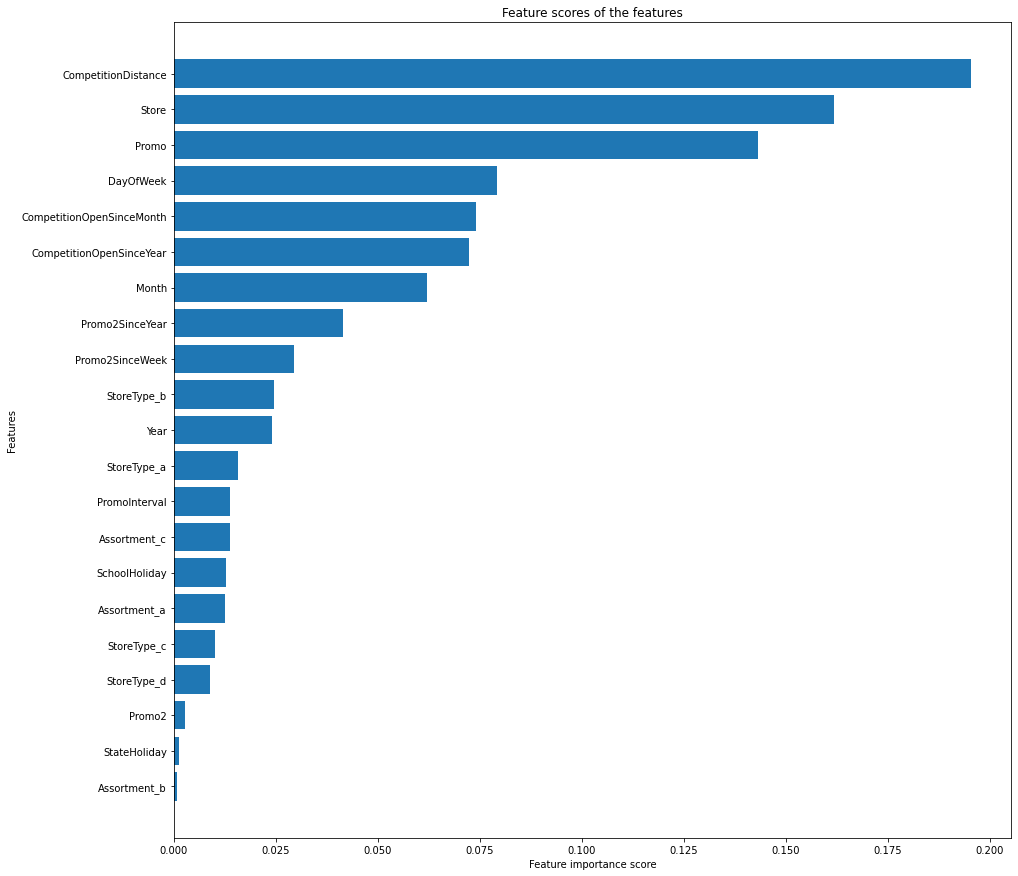

In [ ]:
plt.subplots(figsize=(15, 15))
plt.barh(feature_scores.Feature, feature_scores.Importance)
plt.title("Feature scores of the features")
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.show()

###Mô hình có điều chỉnh thông số

#### Điều chỉnh n_estimators


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
R2s_train = []
R2s_test = []
MAEs = []
MSEs = []
RMSEs = []
RMSPEs = []
estimators = [80, 100, 120]
for i in estimators:
    
    regressor = RandomForestRegressor(random_state=42, n_estimators=i)
    regressor.fit(X_train, y_train)
    
    prediction_open = regressor.predict(X_test)
    prediction_closed = np.zeros(combined_data_closed.shape[0])
    y_predict_regressor = np.append(prediction_open,prediction_closed)

    R2_train_Forest = regressor.score(X_train,y_train)
    R2_Forest = r2_score(y_test,y_predict_regressor)
    MAE_Forest = metrics.mean_absolute_error(y_test,y_predict_regressor)
    MSE_Forest = metrics.mean_squared_error(y_test,y_predict_regressor)
    RMSE_Forest = np.sqrt(metrics.mean_squared_error(y_test,y_predict_regressor))
    RMSPE_Forest = RMSPE(y_test, y_predict_regressor)

    R2s_train.append(R2_train_Forest)
    R2s_test.append(R2_Forest)
    MAEs.append(MAE_Forest)
    MSEs.append(MSE_Forest)
    RMSEs.append(RMSE_Forest)
    RMSPEs.append(RMSPE_Forest)
    
    print('N_estimators = ', i)
    print("R2 in test data: ", R2_Forest)
    print("R2 in training data: ", R2_train_Forest)
    print('MAE: ', MAE_Forest)
    print('MSE: ', MSE_Forest)
    print('RMSE:', RMSE_Forest)
    print('RMSPE:', RMSPE_Forest)

N_estimators =  80
R2 in test data:  0.9652108637662659
R2 in training data:  0.9580027079373171
MAE:  356.97011875485435
MSE:  577324.3748755046
RMSE: 759.8186460435836
RMSPE: 0.12553205770380638
N_estimators =  100
R2 in test data:  0.9652749579165507
R2 in training data:  0.9581272901136981
MAE:  356.6870206604133
MSE:  576260.7349219919
RMSE: 759.118393218075
RMSPE: 0.1255416568838386
N_estimators =  120
R2 in test data:  0.9653113732829767
R2 in training data:  0.958201315840973
MAE:  356.508385267222
MSE:  575656.4233197584
RMSE: 758.7202536638641
RMSPE: 0.12452298810473188


Text(0.5, 1.0, 'Model Evaluation by N_estimators')

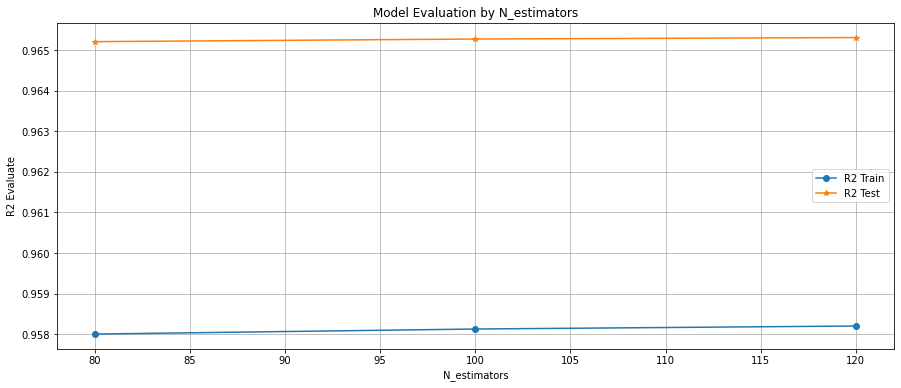

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(estimators, R2s_train, label='R2 Train', marker = 'o')
plt.plot(estimators, R2s_test, label='R2 Test', marker = '*')
plt.xlabel('N_estimators')
plt.ylabel('R2 Evaluate')
plt.legend()
plt.grid()
plt.title('Model Evaluation by N_estimators')

In [ ]:
R2_Forest = max(R2s_test)
max_index = R2s_test.index(R2_Forest)
R2_train_Forest = R2s_train[max_index]
MAE_Forest = MAEs[max_index]
MSE_Forest = MSEs[max_index]
RMSE_Forest = RMSEs[max_index]
RMSPE_Forest = RMSPEs[max_index]
print('Best R2 of model with n_estimators: ', estimators[max_index])
print("R2 test: ", R2_Forest)
print("R2 train: ", R2_train_Forest)
print('MAE: ', MAE_Forest)
print('MSE: ', MSE_Forest)
print('RMSE:', RMSE_Forest)
print('RMSPE:', RMSPE_Forest)

Best R2 of model with n_estimators:  120
R2 test:  0.9653113732829767
R2 train:  0.958201315840973
MAE:  356.508385267222
MSE:  575656.4233197584
RMSE: 758.7202536638641
RMSPE: 0.12452298810473188


#### Điều chỉnh max_depth, min_samples_split, max_leaf_nodes bằng RandomizedSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_dist = {
            'max_depth': [4000, 3000],
            'min_samples_split': [10, 2],
            'max_leaf_nodes': [12000, None],
              }

regressor = RandomForestRegressor(n_estimators=120, random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(regressor, 
                                 param_distributions = param_dist, 
                                 n_iter = 3,
                                 n_jobs = 4,
                                 verbose = 2,
                                 cv = 3)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('Best estimator: ', best_rf)
print('Best parameter: ', rand_search.best_params_)
print("R2 score: ", r2_score(y_test,np.append(best_rf.predict(X_test),np.zeros(combined_data_closed.shape[0]))))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=4000, max_leaf_nodes=12000, min_samples_split=2; total time= 8.6min
[CV] END max_depth=3000, max_leaf_nodes=None, min_samples_split=10; total time= 8.2min
[CV] END max_depth=4000, max_leaf_nodes=12000, min_samples_split=2; total time= 8.5min
[CV] END max_depth=4000, max_leaf_nodes=None, min_samples_split=10; total time= 8.2min
[CV] END max_depth=4000, max_leaf_nodes=12000, min_samples_split=2; total time= 8.7min
[CV] END max_depth=3000, max_leaf_nodes=None, min_samples_split=10; total time= 8.2min
Best estimator:  RandomForestRegressor(max_depth=4000, min_samples_split=10, n_estimators=120,
                      random_state=42)
Best parameter:  {'min_samples_split': 10, 'max_leaf_nodes': None, 'max_depth': 4000}
R2 score:  0.9701706801461882
[CV] END max_depth=4000, max_leaf_nodes=None, min_samples_split=10; total time= 8.1min
[CV] END max_depth=4000, max_leaf_nodes=None, min_samples_split=10; total time= 8.

#### Điều chỉnh max_feature



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
R2s_train = []
R2s_test = []
MAEs = []
MSEs = []
RMSEs = []
RMSPEs = []
features = [1, 3, 'sqrt', 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 21]
for i in features:
    
    regressor = RandomForestRegressor(max_depth=4000, random_state=42, max_leaf_nodes=None, min_samples_split=10, n_estimators=120, max_features=i)
    regressor.fit(X_train, y_train)
    
    prediction_open = regressor.predict(X_test)
    prediction_closed = np.zeros(combined_data_closed.shape[0])
    y_predict_regressor = np.append(prediction_open,prediction_closed)

    R2_train_Forest = regressor.score(X_train,y_train)
    R2_Forest = r2_score(y_test,y_predict_regressor)
    MAE_Forest = metrics.mean_absolute_error(y_test,y_predict_regressor)
    MSE_Forest = metrics.mean_squared_error(y_test,y_predict_regressor)
    RMSE_Forest = np.sqrt(metrics.mean_squared_error(y_test,y_predict_regressor))
    RMSPE_Forest = RMSPE(y_test, y_predict_regressor)

    R2s_train.append(R2_train_Forest)
    R2s_test.append(R2_Forest)
    MAEs.append(MAE_Forest)
    MSEs.append(MSE_Forest)
    RMSEs.append(RMSE_Forest)
    RMSPEs.append(RMSPE_Forest)
    
    print('Max_features = ', i)
    print("R2 in test data: ", R2_Forest)
    print("R2 in training data: ", R2_train_Forest)
    print('MAE: ', MAE_Forest)
    print('MSE: ', MSE_Forest)
    print('RMSE:', RMSE_Forest)
    print('RMSPE:', RMSPE_Forest)

Max_features =  1
R2 in test data:  0.9650644538486541
R2 in training data:  0.9136980850780058
MAE:  361.47885250698306
MSE:  579754.0418150013
RMSE: 761.4158140037553
RMSPE: 0.12127761054703069
Max_features =  3
R2 in test data:  0.9677935204319317
R2 in training data:  0.9203268017113705
MAE:  343.90984719504627
MSE:  534465.2870555043
RMSE: 731.0713282953342
RMSPE: 0.11545044179049536
Max_features =  sqrt
R2 in test data:  0.9686217746464689
R2 in training data:  0.9226068724324021
MAE:  338.10147823197065
MSE:  520720.4402897466
RMSE: 721.6096176533033
RMSPE: 0.11324799696059741
Max_features =  7
R2 in test data:  0.9701546601956864
R2 in training data:  0.9270506856354799
MAE:  327.836116796616
MSE:  495282.26368450106
RMSE: 703.7629314509973
RMSPE: 0.10901625914805385
Max_features =  8
R2 in test data:  0.9702864763213407
R2 in training data:  0.9277674716147752
MAE:  326.978427756197
MSE:  493094.78016003
RMSE: 702.2070778339037
RMSPE: 0.10871111740430157
Max_features =  9
R2 i

Text(0.5, 1.0, 'Model Evaluation by Max_features')

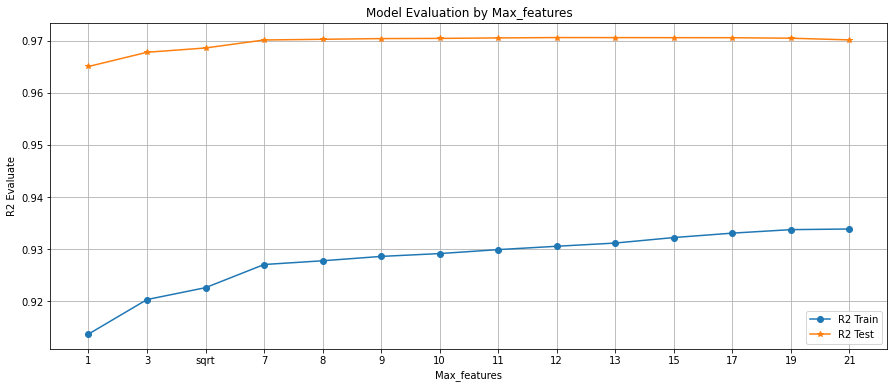

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(features, R2s_train, label='R2 Train', marker = 'o')
plt.plot(features, R2s_test, label='R2 Test', marker = '*')
plt.xlabel('Max_features')
plt.ylabel('R2 Evaluate')
plt.legend()
plt.grid()
plt.title('Model Evaluation by Max_features')

In [ ]:
R2_Forest = max(R2s_test)
max_index = R2s_test.index(R2_Forest)
R2_train_Forest = R2s_train[max_index]
MAE_Forest = MAEs[max_index]
MSE_Forest = MSEs[max_index]
RMSE_Forest = RMSEs[max_index]
RMSPE_Forest = RMSPEs[max_index]
print('Best R2 of model with max_feature: ', features[max_index])
print("R2 test: ", R2_Forest)
print("R2 train: ", R2_train_Forest)
print('MAE: ', MAE_Forest)
print('MSE: ', MSE_Forest)
print('RMSE:', RMSE_Forest)
print('RMSPE:', RMSPE_Forest)

Best R2 of model with max_feature:  12
R2 test:  0.9706198721824455
R2 train:  0.9305522470742541
MAE:  325.0529503168332
MSE:  487562.0886955109
RMSE: 698.256463411196
RMSPE: 0.10782265846883857


In [ ]:
print('Optimal R2 score compared to raw model: ', 0.9706198721824455 - 0.9652749579165507)
print('Optimal MAE compared to raw model: ', 325.0529503168332 - 356.6870206604133)
print('Optimal MSE compared to raw model: ', 487562.0886955109 - 576260.7349219919)
print('Optimal RMSE compared to raw model: ', 698.256463411196 - 759.118393218075)
print('Optimal RMSPE compared to raw model: ', 0.10782265846883857 -  0.1255416568838386)

Optimal R2 score compared to raw model:  0.005344914265894785
Optimal MAE compared to raw model:  -31.634070343580106
Optimal MSE compared to raw model:  -88698.64622648107
Optimal RMSE compared to raw model:  -60.86192980687895
Optimal RMSPE compared to raw model:  -0.01771899841500002


#4.2. Thảo luận

##Báo cáo kết quả mô hình

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
results = [('R2',0.784,0.963,0.971,0.947), 
           ('MAE',984.4,365,325.1, 441.7), 
           ('MSE',3580618,611154,487562,883274), 
           ('RMSE',1892.2,781.8, 698.3, 939.8),
           ( 'RMSPE',0.34175,  0.11079,  0.10782, 0.22318)]

results = [('Linear Regression',0.784,984.4,3580618,1892.2,0.34175), 
           ('Desicion Tree',0.963,365,611154,781.8,0.11079), 
           ('Random Forest',0.971,325.1,487562,698.3, 0.10782), 
           ('K-Nearest Neighbor',0.947,441.7,883274, 939.8, 0.22318)]           
# Khởi tạo DataFrame
df_results = pd.DataFrame(data = results, columns = ['Model','R2', 'MAE', 'MSE','RMSE','RMSPE'])
df_results

,Model,R2,MAE,MSE,RMSE,RMSPE
0,Linear Regression,0.784,984.4,3580618,1892.2,0.34175
1,Desicion Tree,0.963,365.0,611154,781.8,0.11079
2,Random Forest,0.971,325.1,487562,698.3,0.10782
3,K-Nearest Neighbor,0.947,441.7,883274,939.8,0.22318


Text(0.5, 1.0, 'Models Evaluation')

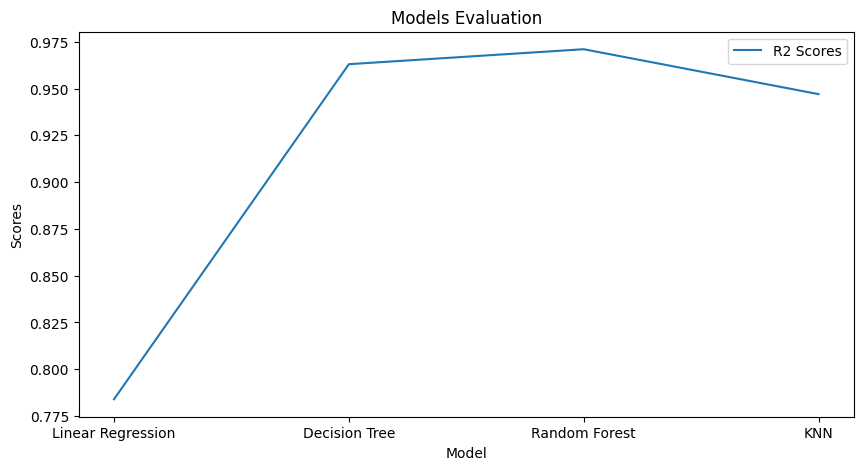

In [ ]:
# Biểu đồ so sánh chỉ số giữa các model: R2
models = [ 'Linear Regression','Decision Tree', 'Random Forest','KNN']
plt.figure(figsize = (10,5))
plt.plot(models, df_results['R2'], label='R2 Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.title('Models Evaluation')

Text(0.5, 1.0, 'Models Evaluation')

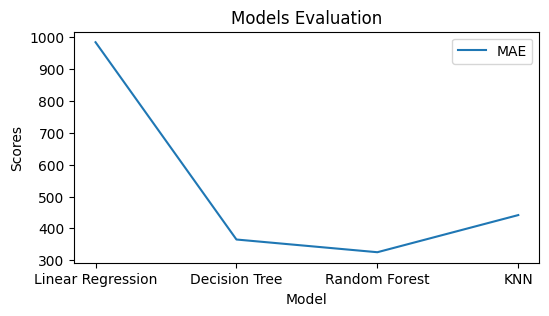

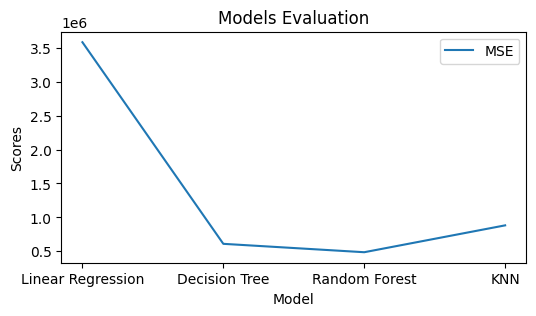

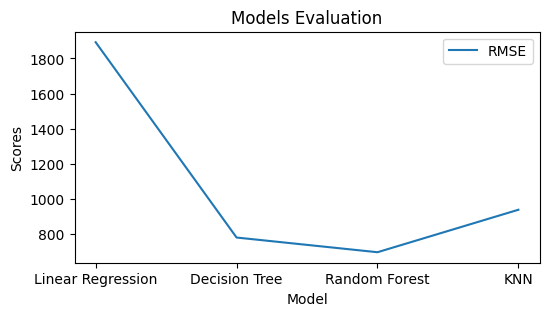

In [ ]:
# Biểu đồ so sánh chỉ số giữa các model: MAE
models = [ 'Linear Regression','Decision Tree', 'Random Forest','KNN']
plt.figure(figsize = (6,3))
plt.plot(models, df_results['MAE'], label='MAE')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.title('Models Evaluation')
# Biểu đồ so sánh chỉ số giữa các model: MSE
models = [ 'Linear Regression','Decision Tree', 'Random Forest','KNN']
plt.figure(figsize = (6,3))
plt.plot(models, df_results['MSE'], label='MSE')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.title('Models Evaluation')
# Biểu đồ so sánh chỉ số giữa các model: RMSE
models = [ 'Linear Regression','Decision Tree', 'Random Forest','KNN']
plt.figure(figsize = (6,3))
plt.plot(models, df_results['RMSE'], label='RMSE')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.title('Models Evaluation')

Text(0.5, 1.0, 'Models Evaluation')

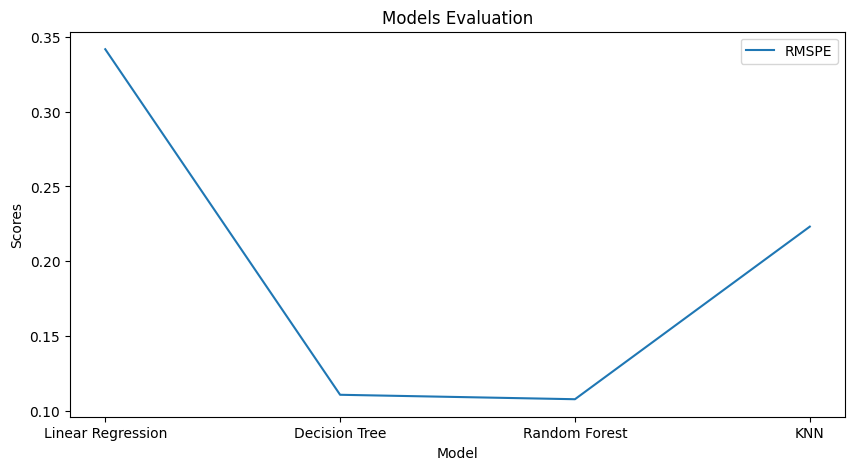

In [ ]:
# Biểu đồ so sánh chỉ số giữa các model: RMSPE
models = [ 'Linear Regression','Decision Tree', 'Random Forest','KNN']
plt.figure(figsize = (10,5))
plt.plot(models, df_results['RMSPE'], label='RMSPE')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.title('Models Evaluation')

##Những features quan trọng

In [ ]:
# Decision Tree
dtree_importance.sort_values(by=['Importance'], ascending=False)

,Feature,Importance
1,CompetitionDistance,0.198299
0,Store,0.164238
9,Promo,0.144933
8,DayOfWeek,0.077947
3,CompetitionOpenSinceYear,0.074483
2,CompetitionOpenSinceMonth,0.071056
13,Month,0.058147
6,Promo2SinceYear,0.040562
5,Promo2SinceWeek,0.030060
15,StoreType_b,0.026183


In [ ]:
# Random forest
feature_scores = pd.DataFrame(reg.feature_importances_, index=combined_data_open.drop(['Sales','Customers','Open'], axis = 1).columns).reset_index()
feature_scores.columns = ["Feature", "Importance"]
feature_scores = feature_scores.sort_values(by=["Importance"], ascending=True)
feature_scores.sort_values(by=["Importance"], ascending=False)

,Feature,Importance
1,CompetitionDistance,0.195397
0,Store,0.161817
9,Promo,0.143197
8,DayOfWeek,0.079179
2,CompetitionOpenSinceMonth,0.074111
3,CompetitionOpenSinceYear,0.072461
13,Month,0.062088
6,Promo2SinceYear,0.041549
5,Promo2SinceWeek,0.029429
15,StoreType_b,0.024596


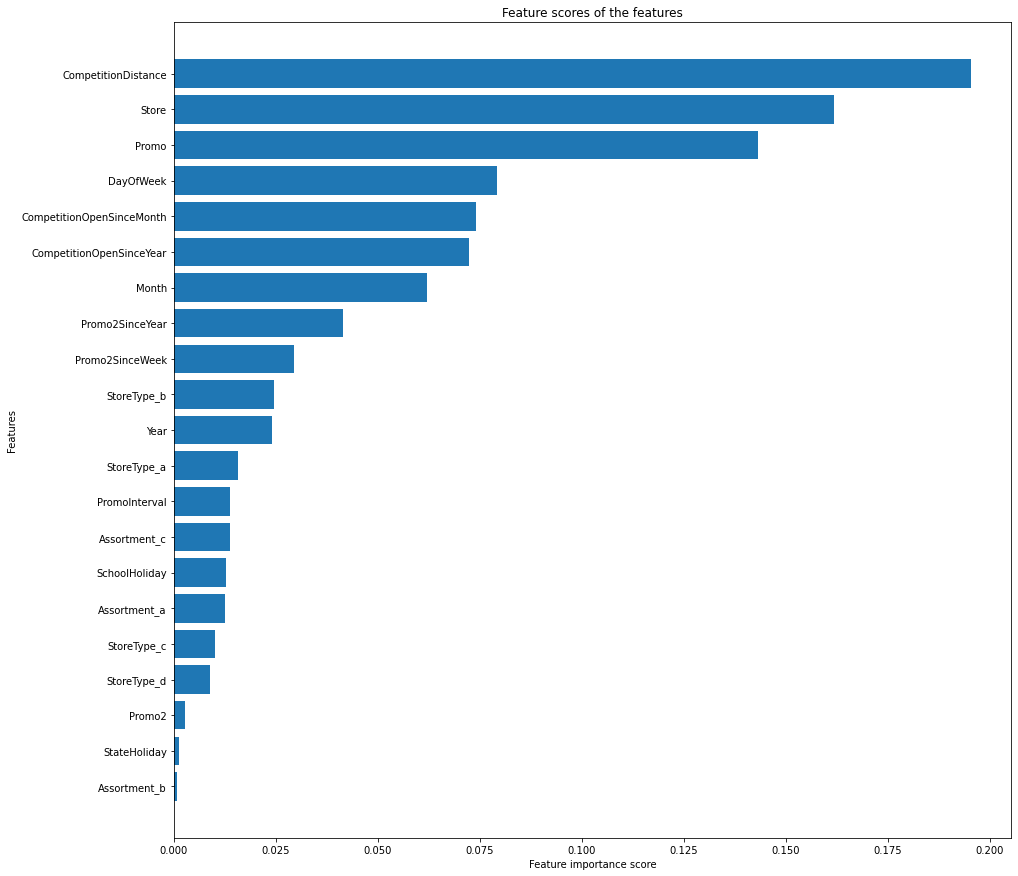

In [ ]:
plt.subplots(figsize=(15, 15))
plt.barh(feature_scores.Feature, feature_scores.Importance)
plt.title("Feature scores of the features")
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.show()